<a href="https://colab.research.google.com/github/raddva/bike-sharing-dataset/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadya Auradiva
- **Email:** nadyaworkspaces@gmail.com
- **ID Dicoding:** raddva

## Menentukan Pertanyaan Bisnis

- Bagaimana musim memengaruhi penyewaan sepeda?
- Apakah terdapat perbedaan signifikan dalam penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv("https://raw.githubusercontent.com/raddva/bike-sharing-dataset/refs/heads/main/data/day.csv")
hour = pd.read_csv("https://raw.githubusercontent.com/raddva/bike-sharing-dataset/refs/heads/main/data/hour.csv")

**Insight:**
- Mengumpulkan data yang berasal dari 2 sumber: `day.csv` dan `hour.csv`. Kedua data ini mencakup informasi rinci tentang penyewaan sepeda berdasarkan waktu, cuaca, dan juga suhu.

### Assessing Data

In [3]:
# melihat informasi data
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [4]:
# menampilkan beberapa baris awal data
day.head()
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# mengecek value yang hilang
day.isnull().sum()
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
# mengecek value yang hilang
day.duplicated().sum()
hour.duplicated().sum()

0

**Insight:**
- Perbedaan antara kedua data tersebut terletak pada kolom `hr` dimana hanya tabel `hour.csv` yang memiliki kolom untuk value tersebut. Kolom `hr` digunakan sebagai nilai yang mencatat jam peminjaman.
- Kedua data tersebut telah berstatus bersih (clean) karena tidak lagi memiliki value yang berisi `null` ataupun kolom terduplikat yang perlu dibersihkan.

### Cleaning Data

In [7]:
# Menghapus atau mengisi nilai yang hilang
hour.dropna(inplace=True)
day.dropna(inplace=True)

# Memeriksa duplikasi
hour.drop_duplicates(inplace=True)
day.drop_duplicates(inplace=True)

**Insight:**
- Menjalankan fungsi `dropna()` dan `drop_duplicates()` untuk menghapus nilai yang hilang dan duplikasi. Namun, karena data sudah bersih (tidak ada nilai hilang atau duplikasi), operasi ini menjadi tidak diperlukan dan tidak memengaruhi dataset.

## Exploratory Data Analysis (EDA)

### Explore

In [8]:
# menggabungkan data
all_data = pd.concat([day, hour], ignore_index=True)

all_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,17379.000000
mean,8354.006405,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,11.546752
std,5180.771860,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,6.914405
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3797.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,8324.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,12.000000
75%,12851.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,18.000000
max,17379.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,23.000000


In [9]:
all_data.to_csv('main_data.csv', index=False)

**Insight:**
- Melakukan penggabungan terhadap kedua data dengan `concat()` karena kedua data memiliki struktur yang sama dan tidak saling terhubung satu sama lain.
- Menyimpan dataset gabungan ke file CSV bernama `main_data.csv` tanpa menyertakan indeks, sehingga siap digunakan untuk analisis lebih lanjut.

## Visualization & Explanatory Analysis

In [10]:
main_data = pd.read_csv('main_data.csv')

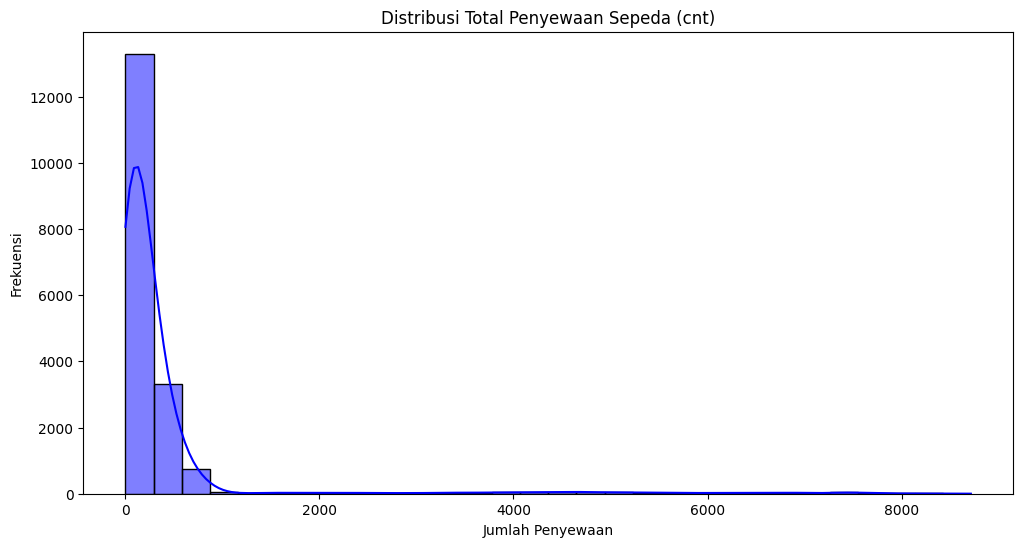

In [11]:
# EDA Univariate
plt.figure(figsize=(12, 6))
sns.histplot(all_data['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribusi Total Penyewaan Sepeda (cnt)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

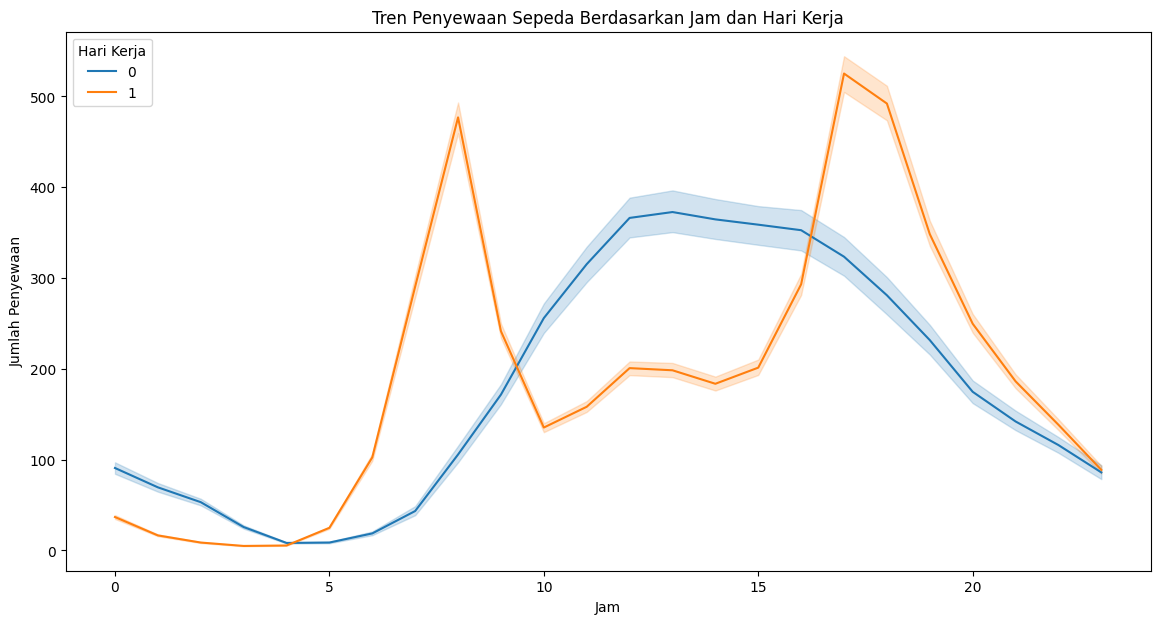

In [12]:
# Analisis Tren Waktu
plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=main_data, palette='tab10')
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam dan Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari Kerja', loc='upper left')
plt.show()

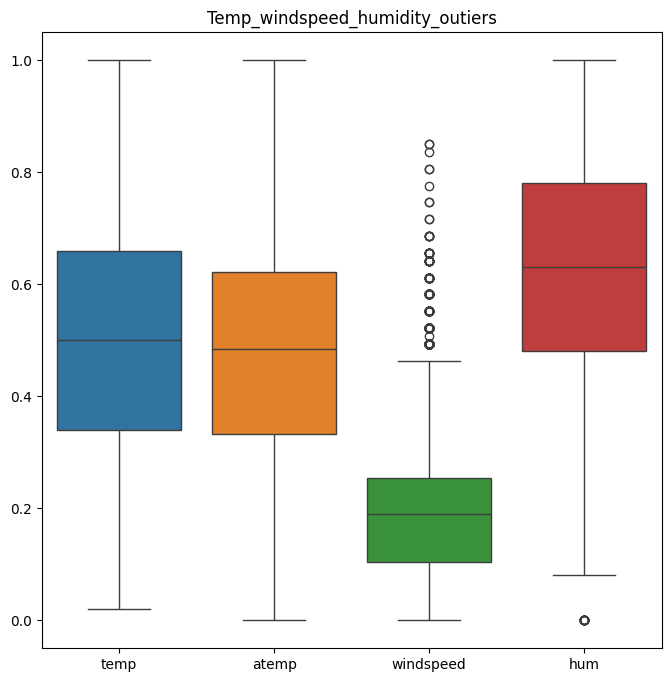

In [13]:
# checking for outliers in temp atemp windspeed hum
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=main_data[['temp','atemp','windspeed','hum',]])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

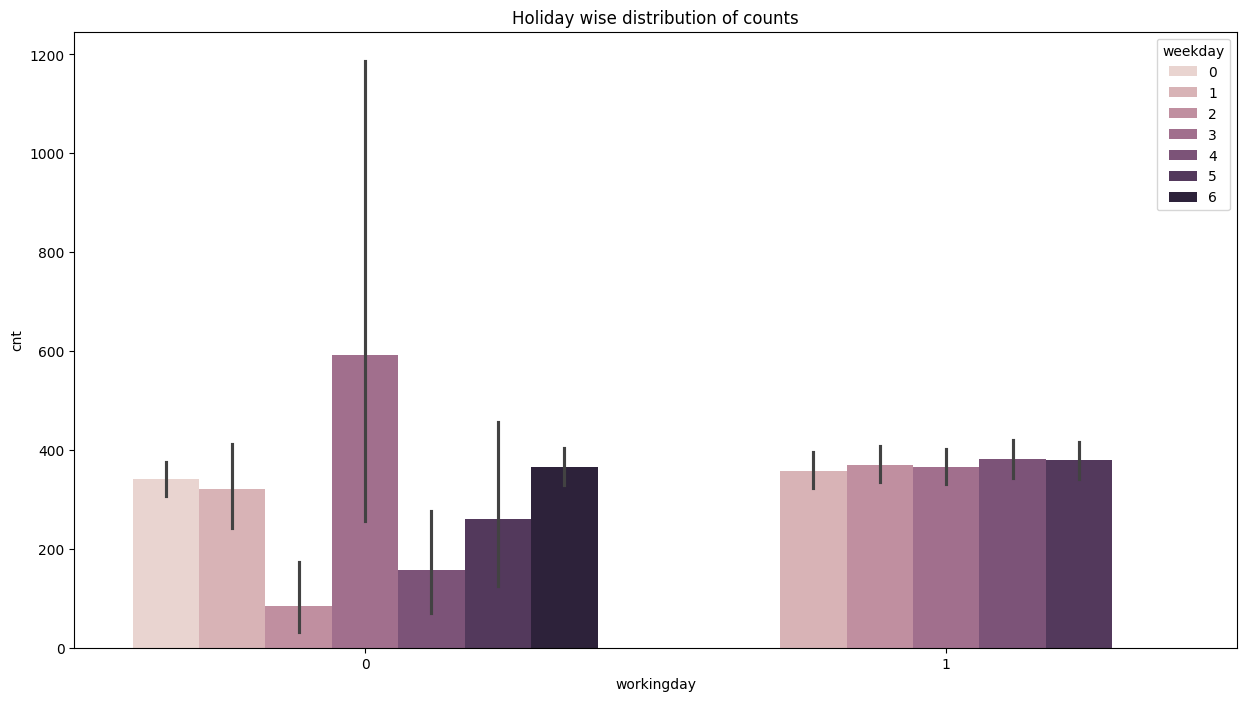

In [14]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=main_data,x='workingday',y='cnt',hue='weekday')
ax.set_title('Holiday wise distribution of counts')
plt.show()

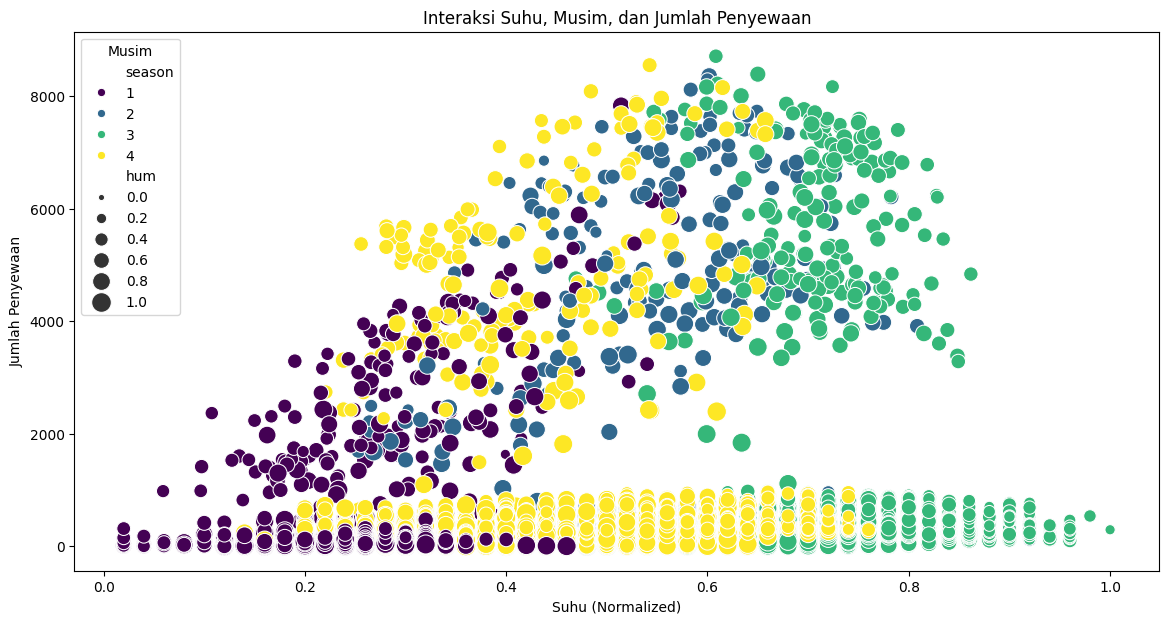

In [15]:
# Interaksi antara suhu, musim, dan jumlah penyewaan
plt.figure(figsize=(14, 7))
sns.scatterplot(x='temp', y='cnt', hue='season', size='hum', data=main_data, palette='viridis', sizes=(20, 200))
plt.title('Interaksi Suhu, Musim, dan Jumlah Penyewaan')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Musim', loc='upper left')
plt.show()

### Bagaimana musim memengaruhi penyewaan sepeda?


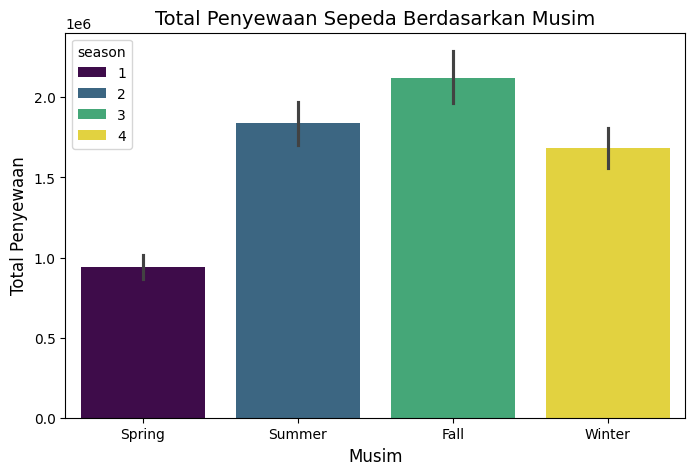

In [16]:
# Diagram batang jumlah penyewaan per musim
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=main_data, hue='season', estimator=sum, palette='viridis', dodge=False)
plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.show()

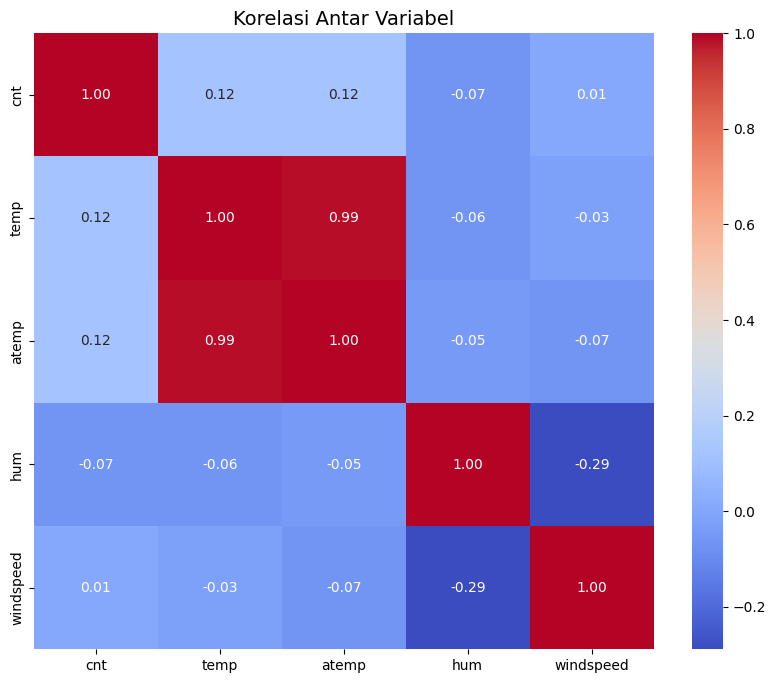

In [17]:
# Heatmap korelasi antar variabel
plt.figure(figsize=(10, 8))
correlation = main_data[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel', fontsize=14)
plt.show()

### Apakah terdapat perbedaan signifikan dalam penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

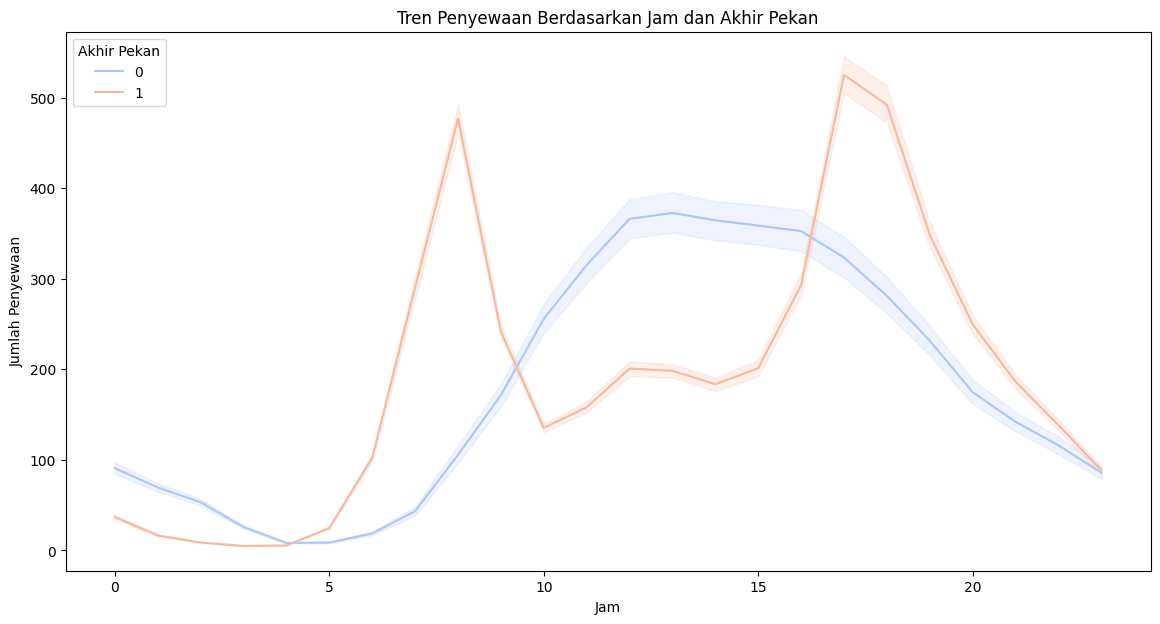

In [18]:
# Analisis Jam dan Akhir Pekan
plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=main_data, palette='coolwarm')
plt.title('Tren Penyewaan Berdasarkan Jam dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Akhir Pekan', loc='upper left')
plt.show()

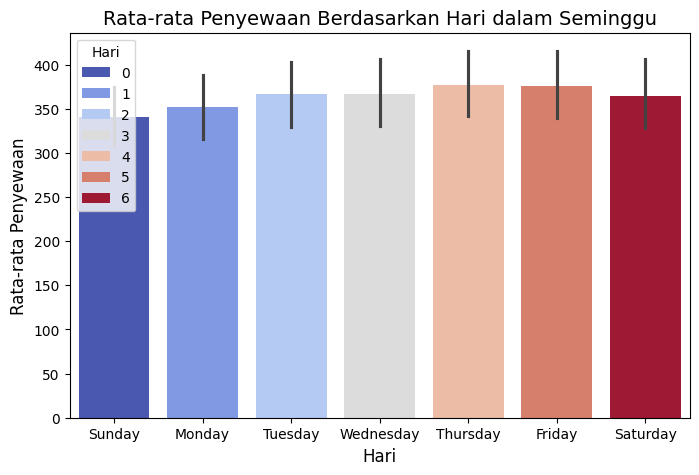

In [19]:
# Penyewaan rata-rata per hari dalam seminggu
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=main_data, estimator='mean', hue='weekday', palette='coolwarm', dodge=False)
plt.title('Rata-rata Penyewaan Berdasarkan Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend(title='Hari', loc='upper left')
plt.show()

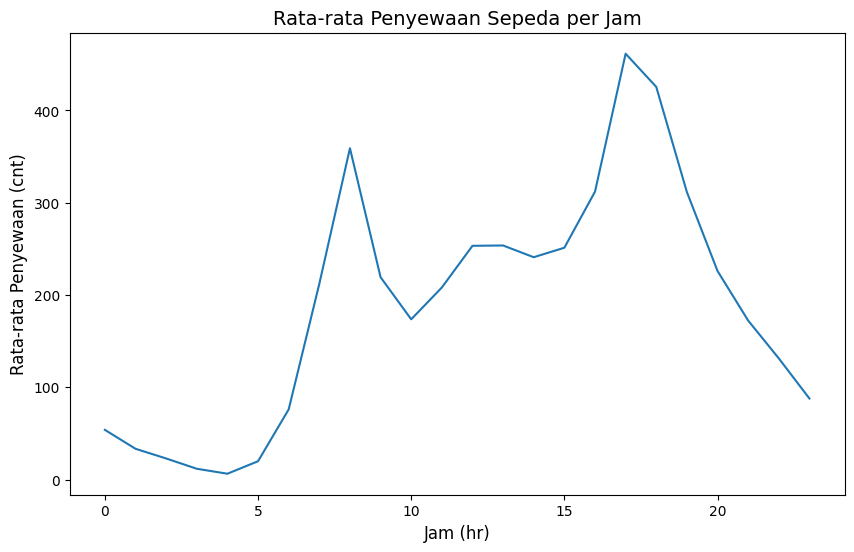

In [20]:
# Penyewaan per jam (mean)
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=main_data, estimator='mean', errorbar=None)
plt.title('Rata-rata Penyewaan Sepeda per Jam', fontsize=14)
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan (cnt)', fontsize=12)
plt.show()

**Insight:**
- Visualisasi data membantu melihat hubungan antara berbagai faktor yang memengaruhi penggunaan sepeda
- Dengan grafik seperti diagram batang atau garis, kita bisa melihat tren, seperti kapan jumlah penyewaan sepeda meningkat atau menurun, tanpa harus membaca seluruh tabel data.

## Conclusion

- Kondisi musim dan cuaca mempengaruhi jumlah pengguna. Pengguna cenderung lebih banyak menggunakan sepeda pada musim gugur dan musim panas, dengan jumlah pengguna tertinggi pada cuaca cerah.
- Penggunaan sepeda meningkat signifikan selama jam sibuk pada hari kerja, yaitu pagi dan sore hari, yang mengindikasikan bahwa sepeda digunakan sebagai moda transportasi untuk berangkat dan pulang kerja.